# **TP3:  Numerical Differentiations and Integrations**

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
#import sympy4567    
import scipy
from collections.abc import Callable

## **Exo1:**

Use the forward-difference formulas and backward-difference formulas to determine
each missing entry in the following tables.

### **(a)**

\begin{array}{l|l|l}
x & f(x) & f^{\prime}(x) \\
\hline 0.5 & 0.4794 & 0.852 \\
\hline 0.6 & 0.5646 & 0.852 \\
\hline 0.7 & 0.6442 & 0.796 \\
\hline
\end{array}
We used the forward difference formula to compute $f^{\prime}(0.5)$ and the backward difference formula to compute $f^{\prime}(0.6)$ and $f^{\prime}(0.7)$. If the forward difference formula were used to compute $f^{\prime}(0)$, the result would be 0.796 .

### **(b)**

\begin{array}{l|l|l}
x & f(x) & f^{\prime}(x) \\
\hline 0.0 & 0.00000 & 3.707 \\
\hline 0.2 & 0.74140 & 3.152 \\
\hline 0.4 & 1.3718 & 3.152 \\
\hline
\end{array}
Forward difference was used for the first two, and backward difference for the last one. If backward difference were used for the second one, the answer would be 3.707.

## **Exo2:**

Use the most accurate three-point formula to determine each missing entry in the
following tables.

### **(a)**

\begin{array}{l|l|l}
x & f(x) & f^{\prime}(x) \\
\hline 1.1 & 9.025013 & 17.769705 \\
\hline 1.2 & 11.02318 & 22.193635 \\
\hline 1.3 & 13.46374 & 27.107350 \\
\hline 1.4 & 16.44465 & 32.150850 \\
\hline
\end{array}

For the endpoints of the tables, we use 3-Point Endpoint Formula. The other approximations come from 3-Point Midpoint formula.

### **(b)**

\begin{array}{l|l|l}
x & f(x) & f^{\prime}(x) \\
\hline 8.1 & 16.94410 & 3.092050 \\
\hline 8.3 & 17.56492 & 3.116150 \\
\hline 8.5 & 18.19056 & 3.139975 \\
\hline 8.7 & 18.82091 & 3.163525 \\
\hline
\end{array}

## **Exo3:**

In [326]:
A_0_h = 2.356194
A_0_h_2 = -0.4879837
A_0_h_4 = -0.8815732
A_0_h_8 = -0.9709157

A_1_h = A_0_h_2 + (A_0_h_2 - A_0_h)/(2**2 - 1)
A_1_h_2 = A_0_h_4 + (A_0_h_4 - A_0_h_2)/(2**2 - 1)
A_1_h_4 = A_0_h_8 + (A_0_h_8 - A_0_h_4)/(2**2 - 1)
print(A_1_h, A_1_h_2, A_1_h_4)

A_2_h = A_1_h_2 + (A_1_h_2 - A_1_h)/(2**4 - 1)
A_2_h_2 = A_1_h_4 + (A_1_h_4 - A_1_h_2)/(2**4 - 1)
print(A_2_h, A_2_h_2)

A_3_h = A_2_h_2 + (A_2_h_2 - A_2_h)/(2**6 - 1)
print(A_3_h)

-1.4360429333333333 -1.0127697 -1.0006965333333335
-0.9845514844444444 -0.9998916555555558
-1.0001351503350973


In [327]:
def Richardson_Extrapolation(f: Callable[[float], float],
                             x: float,
                             h: float,
                             n: int = 9,
                             rtol: float = 1e-10
                            ) -> tuple[float, pd.DataFrame]:
    N = n + 1
    D = np.full(shape=(N,N), fill_value=np.nan, dtype=np.float64)
    D[0, 0] = 0.5 * (f(x + h) - f(x - h)) / h
    for i in range(1, N, 1):
        h = 0.5 * h
        D[i, 0] = 0.5 * (f(x + h) - f(x - h)) / h
        I = i + 1
        p = 1
        for j in range(1, I, 1):
            p = 4*p
            D[i, j] = D[i, j-1] + (D[i, j-1] - D[i-1, j-1]) / (p-1)
        if abs(D[i,i] - D[i-1, i-1]) < rtol:
            break
    d = D[i,i]
    columns = [f'O(h^{2*(k+1)})' for k in range(0, I, 1)]
    D = pd.DataFrame(data=D[:I, :I], columns=columns)
    return (d, D)

In [328]:
def f(x): return np.log(1+x)
d, D = Richardson_Extrapolation(f=f, x=1, h=0.1)
print(f"d = {d:.10f}")
D.fillna(value='', inplace=True)
print(D)

d = 0.5000000000
     O(h^2) O(h^4) O(h^6) O(h^8)
0  0.500417                     
1  0.500104    0.5              
2  0.500026    0.5    0.5       
3  0.500007    0.5    0.5    0.5


/var/folders/vb/nb0122bd5lg5w4j7n_3zzb0w0000gn/T/ipykernel_1105/1249246569.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  D.fillna(value='', inplace=True)


## **Exo4**

## **Exo5**

Approximate the following integrals using the Trapezoidal rule, Simpson’s rule and Midpoint rule.

### **(a)**

With $f(x)=x^2 \ln x$ and $h=(1.5-1)=0.5$ the Trapezoid Rule gives
$$
\begin{aligned}
\int_1^{1.5} x^2 \ln x d x & \approx \frac{h}{2}[f(1)+f(1.5)] \\
& =\frac{0.5}{2}\left[1^2 \ln 1+1.5^2 \ln 1.5\right] \approx 0.228
\end{aligned}
$$
The absolute error is
$$
|E|=\frac{h^3}{12}\left|f^{\prime \prime}(\xi)\right|
$$
for some $\xi \in[1,1.5]$. Note that
$$
\left|f^{\prime \prime}(x)\right|=3+2 \ln x
$$
is increasing $\forall x>1$ so
$$
\left|f^{\prime \prime}(\xi)\right| \leq\left|f^{\prime \prime}(1.5)\right|=3+2 \ln 1.5 .
$$
Thus
$$
|E|=\frac{0.5^3}{12}\left|f^{\prime \prime}(\xi)\right| \leq \frac{0.5^3}{12}(3+2 \ln 1.5) \approx 0.040 .
$$
We can conclude:
$$
\int_1^{1.5} x^2 \ln x d x=0.228 \pm 0.040
$$

In [329]:
def TrapezoidalRule(f, a, b):
    h = b - a
    return (h * 0.5 * (f(a) + f(b)))

In [330]:
f_a = lambda x : x**2 * np.log(x)
TrapezoidalRule(f = f_a, a = 1, b = 1.5)

0.22807412331084248

In [331]:
def SimpsonRule(f, a, b):
    h = (b - a)/2
    c = a + h
    return (h/3 * (f(a) + 4*f(c) + f(b))) 

In [332]:
SimpsonRule(f = f_a, a = 1, b = 1.5)

0.19224530741309842

In [333]:
def MidpointRule(f, a, b):
    h = (b - a)/2
    x_0 = a + h
    return 2*h*f(x_0)

In [334]:
MidpointRule(f = f_a, a = 1, b = 1.5)

0.1743308994642264

### **(b)**

In [335]:
f_b = lambda x : np.exp(1)**(3*x) * np.sin(2*x)
print(TrapezoidalRule(f = f_b, a = 0, b = np.pi/4))
print(SimpsonRule(f = f_b, a = 0, b = np.pi/4))
print(MidpointRule(f = f_b, a = 0, b = np.pi/4))

4.143259655194082
2.5836964032474845
1.8039147772741861


## **Exo6**

The degree of precision of a quadrature formula is the largest positive integer $n$ such that the formula is exact for $x^k$, for any $k=0,1,2, \dots, n$.

## **Exo9**

In [336]:
def CompositeTrapezoidal(f: Callable[[float], float], a:float, b:float, n:int) -> float:
    """
    --------------------
    Approximate the integral of 'f(x)' from 'a' to 'b' using Composite Trapezoidal rule/formula
    
    Parameters
    --------------------
    'f' : 'callable'
        function that we want to integrate
    'a' : 'float'
        lower limit of the integral
    'b' : 'float'
        upper limit of the integral
    'n' : 'int'
        (n+1) be the number of nodes
        
    Return
    -------------------
    'A' : 'float'
        the approximated value of the integral
    """
    h = (b-a) / n
    f_0 = f(a) + f(b)
    f_i = 0
    for i in range(1, n):
        x = a + i*h
        f_i = f_i + f(x)
    A = 0.5 * h * (f_0 + 2*f_i)
    return A

## **Exo10**

Use the Composite Trapezoidal rule with the indicated values of n to approximate the
following integrals.

### **(a)**

In [337]:
f_10_a = lambda x: x * np.log(x)
CompositeTrapezoidal(f = f_10_a, a = 1, b = 2, n = 4)

0.639900477687986

### **(b)**

In [338]:
f_10_b = lambda x: x / (x**2 + 4)
CompositeTrapezoidal(f = f_10_b, a = 1, b = 3, n = 8)

0.4769768665147184

## **Exo11**

In [339]:
def CompositeSimpson(f: Callable[[float], float], a:float, b:float, n:int) -> float:
    """
    --------------------
    Approximate the integral of 'f(x)' from 'a' to 'b' using Composite Simpson rule/formula
    
    Parameters
    --------------------
    'f' : 'callable'
        function that we want to integrate
    'a' : 'float'
        lower limit of the integral
    'b' : 'float'
        upper limit of the integral
    'n' : 'int'
        (n+1) be the number of nodes
        
    Return
    -------------------
    'A' : 'float'
        the approximated value of the integral
    """
    h = (b-a) / n
    f_0 = f(a) + f(b)
    f_1 = 0
    f_2 = 0
    for i in range(1, n):
        x = a + i*h
        if (i % 2 == 0):
            f_2 = f_2 + f(x)
        else:
            f_1 = f_1 + f(x)
    A = h * (f_0 + 2*f_2 + 4*f_1) / 3
    return A

## **Exo12**

Use the Composite Simpson’s rule with the indicated values of n to approximate the
following integrals.

### **(a)**

In [340]:
f_12_a = lambda x: x**3 * np.exp(x)
CompositeSimpson(f = f_12_a, a = -2, b = 2, n = 4)

22.477125358234236

### **(b)**

In [341]:
f_12_b = lambda x: x**2 * np.cos(x)
CompositeSimpson(f = f_12_b, a = 1, b = 3, n = 6)
print(CompositeSimpson(f = f_12_b, a = 0, b = np.pi, n = 6))

-6.274868388453119


## **Exo13**

In [342]:
def CompositeMidpoint(f: Callable[[float], float], a:float, b:float, n:int) -> float:
    """
    --------------------
    Approximate the integral of 'f(x)' from 'a' to 'b' using Composite Midpoint rule/formula
    
    Parameters
    --------------------
    'f' : 'callable'
        function that we want to integrate
    'a' : 'float'
        lower limit of the integral
    'b' : 'float'
        upper limit of the integral
    'n' : 'int'
        (n+1) be the number of nodes
        
    Return
    -------------------
    'A' : 'float'
        the approximated value of the integral
    """
    h = (b-a) / (n+2)
    f_2 = 0
    for i in range(0, n+3):
        x = a + i*h
        if (i % 2 != 0):
            f_2 = f_2 + f(x)
    A = 2 * h * f_2
    return A

## **Exo14**

Use the Composite Midpoint rule with $n + 2$ subintervals to approximate the following
integrals.

### **(a)**

In [343]:
f_14_a = lambda x: 2 / (x**2 + 4)
CompositeMidpoint(f = f_14_a, a = 0, b = 2, n = 6)

0.7867001295984857

### **(b)**

In [344]:
f_14_b = lambda x: np.exp(2*x) * np.sin(3*x)
CompositeMidpoint(f = f_14_b, a = 0, b = 2, n = 8)

-14.998476941632308

## **Exo15**

In [345]:
f_15 = lambda x: x**2 * np.exp(-x**2)
print(CompositeTrapezoidal(f = f_15, a = 0, b = 2, n = 10))
print(CompositeSimpson(f = f_15, a = 0, b = 2, n = 10))
print(CompositeMidpoint(f = f_15, a = 0, b = 2, n = 10))

0.42199311293715774
0.42272181145798154
0.4237375413895468


## **Exo16**

### **(a)**

In [346]:
h_CT = np.sqrt(6*10**(-5)/0.03125)
n_CT = 2/h_CT
print(h_CT, n_CT)

0.04381780460041329 45.64354645876384


In [347]:
f_16 = lambda x: 1 / (x + 4)
CompositeTrapezoidal(f = f_16, a = 0, b = 2, n = 46)

0.40547057780408446

### **(b)**

In [348]:
h_CS = (90*10**(-5)/0.0234375)**(1/4)
n_CS = 2/h_CS
print(h_CS, n_CS)

0.44267276788012866 4.518010018049224


In [349]:
CompositeSimpson(f = f_16, a = 0, b = 2, n = 6)

0.4054663745840217

### **(c)**

In [350]:
h_CM = np.sqrt(3*10**(-5)/0.03125)
n_CM = (2/h_CM) - 2
print(h_CM, n_CM)

0.03098386676965934 62.549722436790276


In [351]:
CompositeMidpoint(f = f_16, a = 0, b = 2, n = 64)

0.40545979433290036

## **Exo17**

### **(a)**

In [352]:
f_17_a = lambda x: 1 + x**3
f_17_b = lambda x: 1.001 + 0.03*(x-0.1) + 0.3*(x-0.1)**2 + 2*(x-0.1)**3
f_17_c = lambda x: 1.009 + 0.15*(x-0.2) + 0.9*(x-0.2)**2 + 2*(x-0.2)**3

In [353]:
print(f_17_a(0.1) == f_17_b(0.1))
print(round(f_17_b(0.2),3) == f_17_c(0.2))

True
True


In [354]:
D_f_17_a = lambda x: 3*x**2
D_f_17_b = lambda x: 0.03 + 0.6*(x-0.1) + 6*(x-0.1)**2
D_f_17_c = lambda x: 0.15 + 1.8*(x-0.2) + 6*(x-0.2)**2

In [355]:
print(round(D_f_17_a(0.1), 3) == D_f_17_b(0.1))
print(round(D_f_17_b(0.2),3) == D_f_17_c(0.2))

True
True


In [356]:
DD_f_17_a = lambda x: 6*x
DD_f_17_b = lambda x: 0.6 + 12*(x-0.1)
DD_f_17_c = lambda x: 1.8 + 12*(x-0.2)

In [357]:
print(round(DD_f_17_a(0.1), 3) == DD_f_17_b(0.1))
print(round(DD_f_17_b(0.2),3) == DD_f_17_c(0.2))

True
True


In [358]:
DDD_f_17_a = lambda x: 6
DDD_f_17_b = lambda x: 12
DDD_f_17_c = lambda x: 12

In [359]:
print(DDD_f_17_a(0.1) == DDD_f_17_b(0.1))
print(DDD_f_17_b(0.2) == DDD_f_17_c(0.2))

False
True


Since the right and left limits at 0.1 and 0.2 for $f, f', f''$ are the same, the functions are continuous on $[0,0.3]$. However, for the third derivative $f'''$, they are not the same; it is discontinuous at $x=0.1$ but continuous at $x=0.2$.

### **(b)**

In [360]:
sol_b = round(CompositeTrapezoidal(f = f_17_a, a = 0, b = 0.1, n = 6),6) + round(CompositeTrapezoidal(f = f_17_b, a = 0.1, b = 0.2, n = 6),6) + round(CompositeTrapezoidal(f = f_17_c, a = 0.2, b = 0.3, n = 6),6)
sol_b

0.302435

In [361]:
## error bond
(0.1/12)*(0.1/6)**2 * (0.6+1.8+3)

1.25e-05

### **(c)**

In [362]:
sol_c = round(CompositeSimpson(f = f_17_a, a = 0, b = 0.1, n = 6),6) + round(CompositeSimpson(f = f_17_b, a = 0.1, b = 0.2, n = 6),6) + round(CompositeSimpson(f = f_17_c, a = 0.2, b = 0.3, n = 6),6)
sol_c

0.302425

The value of the actual integral and the estimation using Composite Simpson's rule in this case is the same.

## **Exo18**

The length $l$ of the track is $l=\int_0^{84} v(t) d t$.
We don't know the exact formula of $s(t)$. So, the integral can only be approximated by numerical quadrature using the above 15 data points given in the table:
$$
\int_0^{84} v(t) d t \approx \sum_{i=1}^{15} a_i v\left(t_i\right)
$$

Using Composite trapezoidal rule with $h=6$, we get:
$$
\begin{aligned}
l=\int_0^{84} v(t) d t & \approx \frac{6}{2}[124+2(134+148+\cdots+116)+123] \\
& =9855
\end{aligned}
$$
Using composite Simpson's rule with $h=6$, we get:
$$
\begin{aligned}
l=\int_0^{84} v(t) d t \approx & \frac{6}{3}[124+4(134+156+133+109+85+89+116) \\
& +2(148+147+121+99+78+104)+123] \\
& =9858
\end{aligned}
$$

## **Exo19**

In [363]:
def Richardson_Extrapolation(f: Callable[[float], float],
                             x: float,
                             h: float,
                             n: int = 9,
                             rtol: float = 1e-10
                            ) -> tuple[float, pd.DataFrame]:
    N = n + 1
    D = np.full(shape=(N,N), fill_value=np.nan, dtype=np.float64)
    D[0, 0] = 0.5 * (f(x + h) - f(x - h)) / h
    for i in range(1, N, 1):
        h = 0.5 * h
        D[i, 0] = 0.5 * (f(x + h) - f(x - h)) / h
        I = i + 1
        p = 1
        for j in range(1, I, 1):
            p = 4*p
            D[i, j] = D[i, j-1] + (D[i, j-1] - D[i-1, j-1]) / (p-1)
        if abs(D[i,i] - D[i-1, i-1]) < rtol:
            break
    d = D[i,i]
    columns = [f'O(h^{2*(k+1)})' for k in range(0, I, 1)]
    D = pd.DataFrame(data=D[:I, :I], columns=columns)
    return (d, D)

In [364]:
def Romberg_integration(f, a, b, n):
    """Calculate the integral from the Romberg method.
    Args:
        f (function): the equation f(x).
        a (float): the initial point.
        b (float): the final point.
        n (int): number of intervals.
    Returns:
        xi (float): numerical approximation of the definite integral.
    """
    # Initialize the Romberg integration table
    R = np.zeros((n, n))

    # Compute the trapezoid rule for the first column (h = b - a)
    h = b - a
    R[0, 0] = 0.5 * h * (f(a) + f(b))

    # Iterate for each level of refinement
    for i in range(1, n):
        h = 0.5 * h  # Halve the step size
        # Compute the composite trapezoid rule
        sum_f = 0
        for j in range(1, 2**i, 2):
            x = a + j * h
            sum_f += f(x)
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f

        # Richardson extrapolation for higher order approximations
        for k in range(1, i + 1):
            R[i, k] = R[i, k - 1] + \
                (R[i, k - 1] - R[i - 1, k - 1]) / ((4**k) - 1)
            
    columns = [f'O(h^{2*(k+1)})' for k in range(0, n, 1)]
    D = pd.DataFrame(data=R[:n, :n], columns=columns)

    #return float(R[n - 1, n - 1])
    return D

## **Exo20**

In [365]:
f_20_a = lambda x: (np.cos(x))**2
Romberg_integration(f = f_20_a, a=-1, b=1, n=3)

,O(h^2),O(h^4),O(h^6)
0,0.583853,0.000000,0.000000
1,1.291927,1.527951,0.000000
2,1.416114,1.457510,1.452814


In [366]:
f_20_b = lambda x: 1/(x*np.log(x))
Romberg_integration(f = f_20_b, a=np.exp(1), b=2*np.exp(1), n=3)

,O(h^2),O(h^4),O(h^6)
0,0.647654,0.000000,0.000000
1,0.560996,0.532111,0.000000
2,0.535609,0.527146,0.526816


## **Exo21**

In [367]:
f_21 = lambda x: 2*np.exp(-x**2)/np.sqrt(np.pi)
Romberg_integration(f = f_21, a=0, b=1, n=12)

,O(h^2),O(h^4),O(h^6),O(h^8),O(h^10),O(h^12),O(h^14),O(h^16),O(h^18),O(h^20),O(h^22),O(h^24)
0,0.771743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.825263,0.843103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.838368,0.842736,0.842712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.841619,0.842703,0.842701,0.842701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.842431,0.842701,0.842701,0.842701,0.842701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.842633,0.842701,0.842701,0.842701,0.842701,0.842701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.842684,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.842697,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.000000,0.000000,0.000000,0.000000
8,0.842700,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.000000,0.000000,0.000000
9,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.842701,0.000000,0.000000


## **Exo22**

In [368]:
def adaptive_simpson(f, a, b, tol=1e-10):
    """
    Evaluates the integral of f(x) on [a,b].

    USAGE:
        s = adaptive_simpson( f, a, b, tol )

    INPUT:
        f         - function to integrate
        a, b      - left and right endpoints of interval of integration
        tol       - desired upper bound on allowable error

    OUTPUT:
        float     - the value of the integral

    NOTES:
        Integrates the function f(x) on [a,b] with an error bound of
        given by tol using an adaptive Simpson's rule to approximate
        the value of the integral.  Notice that this is not very
        efficient -- it is recursive and recomputes many function
        values that have already been computed.  The code in this
        function is meant to be clear and explain the ideas behind
        adaptive schemes rather than to be an efficient implementation
        of one.

    # Theory says the factor to multiply the tolerance by should be 15, but
    # since that assumes that the fourth derivative of f is fairly constant,
    # we want to be a bit more conservative...
    """

    tol_factor = 10.0

    h = 0.5 * ( b - a )

    x0 = a
    x1 = a + 0.5 * h
    x2 = a + h
    x3 = a + 1.5 * h
    x4 = b

    f0 = f( x0 )
    f1 = f( x1 )
    f2 = f( x2 )
    f3 = f( x3 )
    f4 = f( x4 )

    s0 = h * ( f0 + 4.0 * f2 + f4 ) / 3.0
    s1 = h * ( f0 + 4.0 * f1 + 2.0 * f2 + 4.0 * f3 + f4 ) / 6.0

    if abs( s0 - s1 ) >= tol_factor * tol:
        s = adaptive_simpson( f, x0, x2, 0.5 * tol ) + \
            adaptive_simpson( f, x2, x4, 0.5 * tol )
    else:
        s = s1 + ( s1 - s0 ) / 15.0
    return s

## **Exo23**

In [369]:
f_23_a = lambda x: x + np.sin(4*x)
adaptive_simpson(f = f_23_a, a = 1, b = 2, tol = 1e-5)

1.3729640771470841

In [370]:
f_23_b = lambda x: np.exp(2*x)*np.sin(3*x)
adaptive_simpson(f = f_23_b, a = 1, b = 3, tol = 1e-5)

108.55528119443994

## **Exo24**

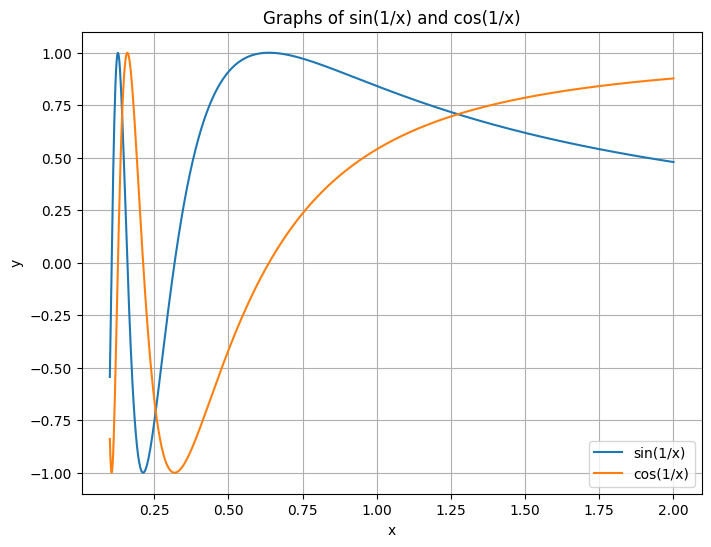

In [371]:
# Define the x values
x = np.linspace(0.1, 2, 1000)

# Calculate the corresponding y values for sin(1/x) and cos(1/x)
y_sin = np.sin(1/x)
y_cos = np.cos(1/x)

# Plotting the graphs
plt.figure(figsize=(8, 6))
plt.plot(x, y_sin, label='sin(1/x)')
plt.plot(x, y_cos, label='cos(1/x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs of sin(1/x) and cos(1/x)')
plt.legend()
plt.grid(True)
plt.show()

In [372]:
f_24_a = lambda x: np.sin(1/x)
adaptive_simpson(f = f_24_a, a = 0.1, b = 2, tol = 1e-3)

1.1455510307670143

In [373]:
f_24_b = lambda x: np.cos(1/x)
adaptive_simpson(f = f_24_b, a = 0.1, b = 2, tol = 1e-3)

0.6738227538304371

## **Exo25**

In [374]:
def u_t(m, k, F_0, omega, t):
    omega_0 = np.sqrt(k/m)
    coeff = F_0 / (m*(omega_0**2 - omega**2))
    return coeff*(np.cos(omega*t) - np.cos(omega_0*t))

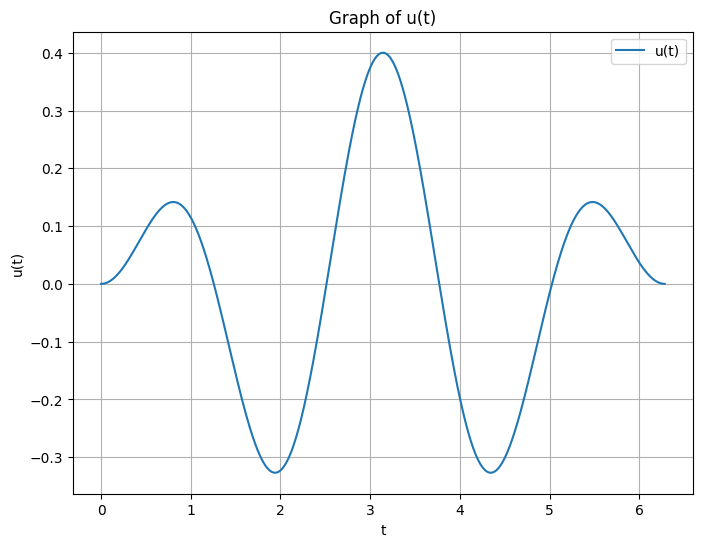

In [375]:
# Define the x values
x = np.linspace(0, 2*np.pi, 1000)

# Calculate the corresponding y values for sin(1/x) and cos(1/x)
y = u_t(m = 1, k = 9, F_0 = 1, omega = 2, t = x)

# Plotting the graphs
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='u(t)')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Graph of u(t)')
plt.legend()
plt.grid(True)
plt.show()

In [376]:
def f_25(x):
    return u_t(m = 1, k = 9, F_0 = 1, omega = 2, t = x)
adaptive_simpson(f = f_25, a = 0, b = 2*np.pi, tol = 1e-4)

-1.249000902703301e-16

## **Exo26**

In [377]:
def degree_to_radian(d):
    return d*np.pi/180

In [378]:
def h_theta0(theta_0, theta):
    return 1/np.sqrt(1 - np.sin(theta_0/2)**2 * np.sin(theta)**2)

In [379]:
f_26_a = lambda x: h_theta0(theta_0=degree_to_radian(15), theta=x)
adaptive_simpson(f = f_26_a, a = 0, b = np.pi/2, tol = 1e-4)

1.5775521458735806

In [380]:
f_26_b = lambda x: h_theta0(theta_0=degree_to_radian(30), theta=x)
adaptive_simpson(f = f_26_b, a = 0, b = np.pi/2, tol = 1e-4)

1.5981499708770925

In [381]:
f_26_c = lambda x: h_theta0(theta_0=degree_to_radian(45), theta=x)
adaptive_simpson(f = f_26_c, a = 0, b = np.pi/2, tol = 1e-4)

1.6336280163612404

In [382]:
f_26 = lambda x: h_theta0(theta_0=0, theta=x)
adaptive_simpson(f = f_26, a = 0, b = np.pi/2, tol = 1e-4)

1.5707963267948966

In [383]:
np.pi/2

1.5707963267948966

## **Exo27**

## **Exo28**

### **(a)**

In [384]:
c_2 = 1.0
x_2_1 = 0.5773502692
x_2_2 = -0.5773502692

In [385]:
sol_a = c_2*np.cosh(x_2_1) + c_2*np.cosh(x_2_2)
sol_a

2.3426960879223864

In [386]:
exact_sol_a = np.sinh(1)-np.sinh(-1)
exact_sol_a

2.3504023872876028

### **(b)**

In [387]:
sol_b = 0.5*(c_2/(1+0.25*(x_2_1-1)**2) + c_2/(1+0.25*(x_2_2-1)**2))
sol_b

0.7868852459010888

In [388]:
exact_sol_b = np.arctan(0)-np.arctan(-1)
exact_sol_b

0.7853981633974483

### **(c)**

In [389]:
sol_c = 0.25*(c_2*(x_2_1+1)/(1+0.25*(1+x_2_1)**2) + c_2*(x_2_2+1)/(1+0.25*(1+x_2_2)**2))
sol_c

0.34426229508006945

In [390]:
exact_sol_c = 0.5*np.log(2)
exact_sol_c

0.34657359027997264

### **(d)**

In [391]:
sol_d = 0.5*np.log(2)*(c_2/(1 + np.exp(0.5*np.log(2)*(x_2_1 + 1))) + c_2/(1 + np.exp(0.5*np.log(2)*(x_2_2 + 1)))) 
sol_d

0.2876849647066895

In [392]:
exact_sol_d = 2*np.log(2) - np.log(3)
exact_sol_d

0.2876820724517808

## **Exo29**

In [393]:
def Gaussian_quadrature(f: Callable[[float], float], a:float, b:float, n:int) -> float:
    """
    --------------------
    Approximate the integral of 'f(x)' from 'a' to 'b' using Gaussian quadrature for n=1,2,3,4,5 (only)
    
    Parameters
    --------------------
    'f' : 'callable'
        function that we want to integrate
    'a' : 'float'
        lower limit of the integral
    'b' : 'float'
        upper limit of the integral
    'n' : 'int'
        (n+1) be the number of nodes
        
    Return
    -------------------
    'A' : 'float'
        the approximated value of the integral
    """
    c_2 = 1.0
    x_2_1 = 0.5773502692
    x_2_2 = -0.5773502692
    
    c_3_1 = 0.8888888889
    c_3_2 = 0.5555555556
    c_3_3 = 0.5555555556
    x_3_1 = -0.0
    x_3_2 = -0.7745966692
    x_3_3 = 0.7745966692
    
    c_4_1 = 0.6521451549
    c_4_2 = 0.6521451549
    c_4_3 = 0.3478548451
    c_4_4 = 0.3478548451
    x_4_1 = 0.3399810436
    x_4_2 = -0.3399810436
    x_4_3 = -0.8611363116
    x_4_4 = 0.8611363116
    
    c_5_1 = 0.5688888889
    c_5_2 = 0.4786286705
    c_5_3 = 0.4786286705
    c_5_4 = 0.2369268851
    c_5_5 = 0.2369268851
    x_5_1 = -0.0000000000
    x_5_2 = 0.5384693101 
    x_5_3 = -0.5384693101
    x_5_4 = -0.9061798459
    x_5_5 = 0.9061798459
    
    A = 0.0
    if (n == 2):
        A = c_2*0.5*(b-a)*(f(0.5*(b+a+(b-a)*x_2_1)) + f(0.5*(b+a+(b-a)*x_2_2)))
    elif (n == 3):
        A = 0.5*(b-a)*(c_3_1*f(0.5*(b+a+(b-a)*x_3_1)) + c_3_2*f(0.5*(b+a+(b-a)*x_3_2)) + c_3_3*f(0.5*(b+a+(b-a)*x_3_3)))
    elif (n == 4):
        A = 0.5*(b-a)*(c_4_1*f(0.5*(b+a+(b-a)*x_4_1)) + c_4_2*f(0.5*(b+a+(b-a)*x_4_2)) + c_4_3*f(0.5*(b+a+(b-a)*x_4_3)) + c_4_4*f(0.5*(b+a+(b-a)*x_4_4)))
    elif (n == 5):
        A = 0.5*(b-a)*(c_5_1*f(0.5*(b+a+(b-a)*x_5_1)) + c_5_2*f(0.5*(b+a+(b-a)*x_5_2)) + c_5_3*f(0.5*(b+a+(b-a)*x_5_3)) + c_5_4*f(0.5*(b+a+(b-a)*x_5_4)) + c_5_5*f(0.5*(b+a+(b-a)*x_5_5))) 
    else:
        print("The solution for n=",n,"is not yet defined !!!")
    
    return A

In [394]:
f_test = lambda x: np.cosh(x)
Gaussian_quadrature(f = f_test, a = -1, b = 1, n = 2)

2.3426960879223864

In [395]:
f_test = lambda x: np.cosh(x)
Gaussian_quadrature(f = f_test, a = -1, b = 1, n = 3)

2.350336928768656

In [396]:
f_test = lambda x: np.cosh(x)
Gaussian_quadrature(f = f_test, a = -1, b = 1, n = 4)

2.35040209214208

In [397]:
f_test = lambda x: np.cosh(x)
Gaussian_quadrature(f = f_test, a = -1, b = 1, n = 5)

2.350402386579478

## **Exo30**

### **(a)**

In [398]:
f_30 = lambda x: x**2 * np.exp(x)
sol_30_a = Gaussian_quadrature(f = f_30, a = -1, b = 0, n = 4) + Gaussian_quadrature(f = f_30, a = 0, b = 1, n = 4)
sol_30_a

0.878884545810477

### **(b)**

In [399]:
sol_30_b = Gaussian_quadrature(f = f_30, a = -1, b = -0.5, n = 2) + Gaussian_quadrature(f = f_30, a = -0.5, b = 0, n = 2) + Gaussian_quadrature(f = f_30, a = 0, b = 0.5, n = 2) + Gaussian_quadrature(f = f_30, a = 0.5, b = 1, n = 2)
sol_30_b

0.8783877961450507

In [400]:
Exact_sol = np.exp(1) - 5/np.exp(1)
Exact_sol

0.8788846226018334

## **Exo31**

In [401]:
def Gaussian_quadrature_10(f: Callable[[float], float], a:float, b:float, n:int) -> float:
    """
    --------------------
    Approximate the integral of 'f(x)' from 'a' to 'b' using Gaussian quadrature for n=1,2,3,4,5 (only)
    
    Parameters
    --------------------
    'f' : 'callable'
        function that we want to integrate
    'a' : 'float'
        lower limit of the integral
    'b' : 'float'
        upper limit of the integral
    'n' : 'int'
        (n+1) be the number of nodes
        
    Return
    -------------------
    'A' : 'float'
        the approximated value of the integral
    """
    c_2 = 1.0
    x_2_1 = 0.5773502692
    x_2_2 = -0.5773502692
    
    c_3_1 = 0.8888888889
    c_3_2 = 0.5555555556
    c_3_3 = 0.5555555556
    x_3_1 = -0.0
    x_3_2 = -0.7745966692
    x_3_3 = 0.7745966692
    
    c_4_1 = 0.6521451549
    c_4_2 = 0.6521451549
    c_4_3 = 0.3478548451
    c_4_4 = 0.3478548451
    x_4_1 = 0.3399810436
    x_4_2 = -0.3399810436
    x_4_3 = -0.8611363116
    x_4_4 = 0.8611363116
    
    c_5_1 = 0.5688888889
    c_5_2 = 0.4786286705
    c_5_3 = 0.4786286705
    c_5_4 = 0.2369268851
    c_5_5 = 0.2369268851
    x_5_1 = -0.0000000000
    x_5_2 = 0.5384693101 
    x_5_3 = -0.5384693101
    x_5_4 = -0.9061798459
    x_5_5 = 0.9061798459
    
    c_6_1 = 0.3607615730481386
    c_6_2 = 0.3607615730481386
    c_6_3 = 0.4679139345726910
    c_6_4 = 0.4679139345726910
    c_6_5 = 0.1713244923791704
    c_6_6 = 0.1713244923791704
    x_6_1 = 0.6612093864662645
    x_6_2 = -0.6612093864662645 
    x_6_3 = -0.2386191860831969
    x_6_4 = 0.2386191860831969
    x_6_5 = -0.9324695142031521
    x_6_6 = 0.9324695142031521
    
    c_7_1 = 0.4179591836734694
    c_7_2 = 0.3818300505051189
    c_7_3 = 0.3818300505051189
    c_7_4 = 0.2797053914892766
    c_7_5 = 0.2797053914892766
    c_7_6 = 0.1294849661688697
    c_7_7 = 0.1294849661688697
    x_7_1 = 0.0000000000000000
    x_7_2 = 0.4058451513773972 
    x_7_3 = -0.4058451513773972
    x_7_4 = -0.7415311855993945
    x_7_5 = 0.7415311855993945
    x_7_6 = -0.9491079123427585
    x_7_7 = 0.9491079123427585
    
    c_8_1 = 0.3626837833783620
    c_8_2 = 0.3626837833783620
    c_8_3 = 0.3137066458778873
    c_8_4 = 0.3137066458778873
    c_8_5 = 0.2223810344533745
    c_8_6 = 0.2223810344533745
    c_8_7 = 0.1012285362903763
    c_8_8 = 0.1012285362903763
    x_8_1 = -0.1834346424956498
    x_8_2 = 0.1834346424956498
    x_8_3 = -0.5255324099163290
    x_8_4 = 0.5255324099163290
    x_8_5 = -0.7966664774136267
    x_8_6 = 0.7966664774136267
    x_8_7 = -0.9602898564975363
    x_8_8 = 0.9602898564975363
    
    c_9_1 = 0.3302393550012598
    c_9_2 = 0.1806481606948574
    c_9_3 = 0.1806481606948574
    c_9_4 = 0.0812743883615744
    c_9_5 = 0.0812743883615744
    c_9_6 = 0.3123470770400029
    c_9_7 = 0.3123470770400029
    c_9_8 = 0.2606106964029354
    c_9_9 = 0.2606106964029354
    x_9_1 = 0.0000000000000000
    x_9_2 = -0.8360311073266358
    x_9_3 = 0.8360311073266358
    x_9_4 = -0.9681602395076261
    x_9_5 = 0.9681602395076261
    x_9_6 = -0.3242534234038089
    x_9_7 = 0.3242534234038089
    x_9_8 = -0.6133714327005904
    x_9_9 = 0.6133714327005904
    
    c_10_1 = 0.2955242247147529
    c_10_2 = 0.2955242247147529
    c_10_3 = 0.2692667193099963
    c_10_4 = 0.2692667193099963
    c_10_5 = 0.2190863625159820
    c_10_6 = 0.2190863625159820
    c_10_7 = 0.1494513491505806
    c_10_8 = 0.1494513491505806
    c_10_9 = 0.0666713443086881
    c_10_10 = 0.0666713443086881
    x_10_1 = -0.1488743389816312
    x_10_2 = 0.1488743389816312
    x_10_3 = -0.4333953941292472
    x_10_4 = 0.4333953941292472
    x_10_5 = -0.6794095682990244
    x_10_6 = 0.6794095682990244
    x_10_7 = -0.8650633666889845
    x_10_8 = 0.8650633666889845
    x_10_9 = -0.9739065285171717
    x_10_10 = 0.9739065285171717
    
    A = 0.0
    if (n == 2):
        A = c_2*0.5*(b-a)*(f(0.5*(b+a+(b-a)*x_2_1)) + f(0.5*(b+a+(b-a)*x_2_2)))
    elif (n == 3):
        A = 0.5*(b-a)*(c_3_1*f(0.5*(b+a+(b-a)*x_3_1)) + c_3_2*f(0.5*(b+a+(b-a)*x_3_2)) + c_3_3*f(0.5*(b+a+(b-a)*x_3_3)))
    elif (n == 4):
        A = 0.5*(b-a)*(c_4_1*f(0.5*(b+a+(b-a)*x_4_1)) + c_4_2*f(0.5*(b+a+(b-a)*x_4_2)) + c_4_3*f(0.5*(b+a+(b-a)*x_4_3)) + c_4_4*f(0.5*(b+a+(b-a)*x_4_4)))
    elif (n == 5):
        A = 0.5*(b-a)*(c_5_1*f(0.5*(b+a+(b-a)*x_5_1)) + c_5_2*f(0.5*(b+a+(b-a)*x_5_2)) + c_5_3*f(0.5*(b+a+(b-a)*x_5_3)) + c_5_4*f(0.5*(b+a+(b-a)*x_5_4)) + c_5_5*f(0.5*(b+a+(b-a)*x_5_5))) 
    elif (n == 6):
        A = 0.5*(b-a)*(c_6_1*f(0.5*(b+a+(b-a)*x_6_1)) + c_6_2*f(0.5*(b+a+(b-a)*x_6_2)) + c_6_3*f(0.5*(b+a+(b-a)*x_6_3)) + c_6_4*f(0.5*(b+a+(b-a)*x_6_4)) + c_6_5*f(0.5*(b+a+(b-a)*x_6_5)) + c_6_6*f(0.5*(b+a+(b-a)*x_6_6))) 
    elif (n == 7):
        A = 0.5*(b-a)*(c_7_1*f(0.5*(b+a+(b-a)*x_7_1)) + c_7_2*f(0.5*(b+a+(b-a)*x_7_2)) + c_7_3*f(0.5*(b+a+(b-a)*x_7_3)) + c_7_4*f(0.5*(b+a+(b-a)*x_7_4)) + c_7_5*f(0.5*(b+a+(b-a)*x_7_5)) + c_7_6*f(0.5*(b+a+(b-a)*x_7_6)) + c_7_7*f(0.5*(b+a+(b-a)*x_7_7))) 
    elif (n == 8):
        A = 0.5*(b-a)*(c_8_1*f(0.5*(b+a+(b-a)*x_8_1)) + c_8_2*f(0.5*(b+a+(b-a)*x_8_2)) + c_8_3*f(0.5*(b+a+(b-a)*x_8_3)) + c_8_4*f(0.5*(b+a+(b-a)*x_8_4)) + c_8_5*f(0.5*(b+a+(b-a)*x_8_5)) + c_8_6*f(0.5*(b+a+(b-a)*x_8_6)) + c_8_7*f(0.5*(b+a+(b-a)*x_8_7)) + c_8_8*f(0.5*(b+a+(b-a)*x_8_8))) 
    elif (n == 9):
        A = 0.5*(b-a)*(c_9_1*f(0.5*(b+a+(b-a)*x_9_1)) + c_9_2*f(0.5*(b+a+(b-a)*x_9_2)) + c_9_3*f(0.5*(b+a+(b-a)*x_9_3)) + c_9_4*f(0.5*(b+a+(b-a)*x_9_4)) + c_9_5*f(0.5*(b+a+(b-a)*x_9_5)) + c_9_6*f(0.5*(b+a+(b-a)*x_9_6)) + c_9_7*f(0.5*(b+a+(b-a)*x_9_7)) + c_9_8*f(0.5*(b+a+(b-a)*x_9_8)) + c_9_9*f(0.5*(b+a+(b-a)*x_9_9))) 
    elif (n == 10):
        A = 0.5*(b-a)*(c_10_1*f(0.5*(b+a+(b-a)*x_10_1)) + c_10_2*f(0.5*(b+a+(b-a)*x_10_2)) + c_10_3*f(0.5*(b+a+(b-a)*x_10_3)) + c_10_4*f(0.5*(b+a+(b-a)*x_10_4)) + c_10_5*f(0.5*(b+a+(b-a)*x_10_5)) + c_10_6*f(0.5*(b+a+(b-a)*x_10_6)) + c_10_7*f(0.5*(b+a+(b-a)*x_10_7)) + c_10_8*f(0.5*(b+a+(b-a)*x_10_8)) + c_10_9*f(0.5*(b+a+(b-a)*x_10_9)) + c_10_10*f(0.5*(b+a+(b-a)*x_10_10))) 

    else:
        print("The solution for n=",n,"is not yet defined !!!")
    
    return A

In [402]:
f_30 = lambda x: x**2 * np.exp(x)
sol_30 = Gaussian_quadrature_10(f = f_30, a = -1, b = 1, n = 8) 
sol_30

0.8788846226018334

In [403]:
Exact_sol = np.exp(1) - 5/np.exp(1)
Exact_sol

0.8788846226018334

In [404]:
f_30 = lambda x: x**2 * np.exp(x)
sol_30 = Gaussian_quadrature_10(f = f_30, a = -1, b = 1, n = 9) 
sol_30

0.8788846226018333

In [405]:
f_30 = lambda x: x**2 * np.exp(x)
sol_30 = Gaussian_quadrature_10(f = f_30, a = -1, b = 1, n = 10) 
sol_30

0.8788846226018334